# a functional application of ensemble model to predict label of bathymetry data
Tim Tyree
6.12.2020

In [1]:

%pylab inline
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lib import XGBHelper as xgbh
import os, pickle
import modin.pandas as pd

from lib.logger import logger
from lib.operari import *
if 'nb_dir' not in globals():
    nb_dir = os.getcwd()
    
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [66]:
# data_floder = input("What is your Bathymetry_Data folder called? ")
# data_folder = 'Bathymetry_Data'
# data_dir_list = find_files(filename=data_folder, search_path = nb_dir + '/..')
# print(data_dir_lst)

# data_fn = 'test/test-part00107.tsv'
data_fn = 'NGDC/NGDC-part00000.tsv'
model_fn = 'NGDC_model.pkl'

In [67]:
def model_dir(s): return nb_dir + f'/../runtime_models/{s}'
def data_dir(fn): return nb_dir + f'/../Bathymetry_Data/{fn}'

file_name = model_dir(model_fn)
xgb_model_loaded = pickle.load(open(file_name, "rb"))

dropped_cols = [3,4,5,35]
df = pd.read_csv(data_dir(data_fn), header=None, sep=' ').rename(
    columns={0:'lat', 1:'long'}).drop(columns=dropped_cols)

In [76]:
df = processing_df(df)
df.describe().T

NameError: name 'processing_df' is not defined

In [71]:
result = xgb_model_loaded.predict(
    data=df.values,
    num_iteration=None,
    raw_score=False,
    pred_leaf=False,
    pred_contrib=False,
    data_has_header=False,
    is_reshape=True,
)

In [53]:
# df.describe().T

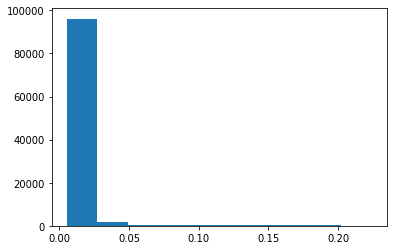

In [72]:
plt.hist(result)
plt.show()

In [75]:
print(f"max score was {np.max(result):.4f}.")
print(f"mean score was {np.mean(result):.4f}.")
print(f"min score was {np.min(result):.4f}.")

max score was 0.2240.
mean score was 0.0126.
min score was 0.0054.


max score was 0.02250869083905492.
mean score was 0.009808169851498471.
min score was 0.006940446619438943.